# Credit Card Fraud Detection using Convolution Neural Network. (DeepLearning)

In [65]:
# Importing the necessary libraries for perfoming CNN:


import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
%matplotlib inline

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten,Dense,Dropout,BatchNormalization
from tensorflow.keras.layers import Conv1D,MaxPool1D

In [3]:
# Importing the dataset

data = pd.read_csv("C:/Users/tkjay/Desktop/creditcard.csv")

In [4]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
data.shape

(284807, 31)

In [6]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [7]:
data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

### Balancing the dataset 

In [ ]:
# Balancing the dataset as the fraudulent and the non_fradulent is highly imbalanced...

In [8]:
non_fraud = data[data['Class']==0]
fraud = data[data['Class']==1]

In [9]:
non_fraud.shape,fraud.shape

((284315, 31), (492, 31))

In [10]:
# The balanced dataset.

non_fraud = non_fraud.sample(fraud.shape[0])
non_fraud.shape,fraud.shape

((492, 31), (492, 31))

In [12]:
# Appending the balanced dataset.

data = fraud.append(non_fraud, ignore_index = True)

In [13]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
1,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
2,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
3,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
4,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1


In [14]:
data.shape

(984, 31)

In [15]:
#Preparing the data for training and testing:

x = data.drop('Class',axis = 1)
y = data.Class

In [17]:
x.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.126911,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00
1,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,2.102339,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00
2,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.430022,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93
3,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,-0.171608,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00
4,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,0.009061,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00
5,7526.0,0.008430,4.137837,-6.240697,6.675732,0.768307,-3.353060,-1.631735,0.154612,-2.795892,...,0.488378,0.364514,-0.608057,-0.539528,0.128940,1.488481,0.507963,0.735822,0.513574,1.00
6,7535.0,0.026779,4.132464,-6.560600,6.348557,1.329666,-2.513479,-1.689102,0.303253,-3.139409,...,0.587743,0.370509,-0.576752,-0.669605,-0.759908,1.605056,0.540675,0.737040,0.496699,1.00
7,7543.0,0.329594,3.712889,-5.775935,6.078266,1.667359,-2.420168,-0.812891,0.133080,-2.214311,...,0.269773,0.156617,-0.652450,-0.551572,-0.716522,1.415717,0.555265,0.530507,0.404474,1.00
8,7551.0,0.316459,3.809076,-5.615159,6.047445,1.554026,-2.651353,-0.746579,0.055586,-2.678679,...,0.388307,0.208828,-0.511747,-0.583813,-0.219845,1.474753,0.491192,0.518868,0.402528,1.00
9,7610.0,0.725646,2.300894,-5.329976,4.007683,-1.730411,-1.732193,-3.968593,1.063728,-0.486097,...,0.504646,0.589669,0.109541,0.601045,-0.364700,-1.843078,0.351909,0.594550,0.099372,1.00


In [21]:
y.head(1000).value_counts()

1    492
0    492
Name: Class, dtype: int64

In [22]:
# Splitting the data for training and testing.

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2, stratify = y,random_state = 0)

In [23]:
x_test

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
655,139830.0,2.043608,-0.725374,-1.760712,-0.602052,-0.644548,-2.332247,0.405536,-0.708685,-1.013473,...,0.077354,0.456463,1.122234,-0.031784,0.994538,0.290809,0.013831,-0.095630,-0.057232,100.00
233,70071.0,-0.440095,1.137239,-3.227080,3.242293,-2.033998,-1.618415,-3.028013,0.764555,-1.801937,...,0.895841,0.764187,-0.275578,-0.343572,0.233085,0.606434,-0.315433,0.768291,0.459623,227.30
114,41164.0,-5.932778,4.571743,-9.427247,6.577056,-6.115218,-3.661798,-10.894079,3.709210,-5.859524,...,1.191078,2.014272,-0.167417,0.049968,0.384430,-0.077884,0.565493,1.792012,0.371007,5.30
309,93879.0,-12.833631,7.508790,-20.491952,7.465780,-11.575304,-5.140999,-14.020564,8.332120,-4.337713,...,-1.378923,2.966842,0.615344,-0.766495,0.431261,-0.104975,-0.010091,-2.400811,-0.720557,104.03
282,87883.0,-1.360293,-0.458069,-0.700404,2.737229,-1.005106,2.891399,5.802537,-1.933197,-1.017717,...,-1.493401,-0.936990,-0.053812,0.580106,0.216927,0.151643,-0.332115,-0.469800,-1.495006,829.41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
955,97944.0,-2.024746,1.596610,0.184037,0.000697,-1.432527,-0.310163,-0.634690,1.257521,1.792133,...,-0.088895,0.191967,0.930570,-0.072207,-0.033881,-0.078811,-0.124412,0.334306,0.087707,72.84
924,112267.0,-1.836891,-1.692991,1.453455,1.202440,-2.423312,1.960636,2.668085,0.093881,0.011783,...,1.652955,0.481009,0.067709,1.466521,-0.606439,0.492930,-0.482129,-0.322625,-0.094617,792.35
825,152644.0,2.058796,-0.116165,-1.111531,0.399652,-0.147601,-1.107611,0.114704,-0.259936,0.663696,...,-0.279698,-0.297345,-0.752434,0.348093,-0.105295,-0.330408,0.208114,-0.072686,-0.062984,1.29
397,139117.0,-3.975939,-1.244939,-3.707414,4.544772,4.050676,-3.407679,-5.063118,1.007042,-3.190158,...,2.109403,1.059737,-0.037395,0.348707,-0.162929,0.410531,-0.123612,0.877424,0.667568,8.30


In [24]:
x_train

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
845,3767.0,1.185316,-0.628893,0.732393,-0.367168,-1.113819,-0.696507,-0.610565,-0.172431,0.495528,...,0.139611,-0.148807,-0.462590,0.146253,0.312800,0.055187,-0.518387,-0.016010,0.030048,90.65
898,145767.0,-0.790117,0.901361,-3.165906,-0.405103,0.708777,-1.180999,1.684885,0.177115,-0.682932,...,-0.356529,0.474542,1.440634,0.213839,-0.911208,-0.932672,0.452081,0.262695,0.032160,145.36
45,18399.0,-14.474437,6.503185,-17.712632,11.270352,-4.150142,-3.372098,-16.535807,-1.443947,-6.815273,...,1.101250,-2.475962,0.342391,-3.564508,-0.818140,0.153408,0.755079,2.706566,-0.992916,1.00
536,14864.0,-1.747939,3.712444,-4.433956,1.365442,0.274492,-0.576648,-1.128151,2.140932,0.549529,...,0.104286,-0.203323,-0.443246,0.256061,-1.745987,-0.047417,-0.315724,0.039689,-0.087413,1.79
739,123873.0,2.000119,-0.206790,-1.141910,0.435932,-0.204175,-1.181521,0.185832,-0.303999,0.637557,...,-0.193331,-0.279871,-0.780307,0.310066,-0.039829,-0.324142,0.198226,-0.081412,-0.055966,35.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,59840.0,-3.215382,-0.364223,-1.261883,3.794949,0.711206,-1.316476,-5.165141,0.625278,-1.582301,...,0.019626,0.401341,0.152191,-0.934675,-0.256148,-0.469403,-0.282496,0.866077,-0.433466,5.91
711,131081.0,1.970365,0.495941,-2.284592,1.375256,1.082559,-0.645364,0.614808,-0.220852,-0.217355,...,-0.167588,0.025771,0.254204,-0.011520,0.595812,0.460680,-0.544617,-0.002930,-0.029534,15.17
31,12095.0,-4.727713,3.044469,-5.598354,5.928191,-2.190770,-1.529323,-4.487422,0.916392,-1.307010,...,-0.207759,0.650988,0.254983,0.628843,-0.238128,-0.671332,-0.033590,-1.331777,0.705698,30.39
882,136253.0,1.252574,-2.583373,-1.259406,-0.560590,-1.538273,-0.344019,-0.457344,-0.046795,0.028043,...,0.801951,0.506029,0.344291,-0.257065,-0.342890,-0.397308,-0.220131,-0.103693,0.013584,477.00


In [42]:
# As the code data is varied with a large number of variation, we standardize the data using StandardScaler() method.

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [49]:
x_train = np.array(x_train)
x_test = np.array(x_test)

In [37]:
x_test

array([[ 1.10094488,  0.78685936, -0.64652482, ..., -0.1747737 ,
        -0.20478652, -0.01605261],
       [-0.34371497,  0.35475391, -0.18075977, ...,  0.63073479,
         0.94378251,  0.48882338],
       [-0.94235861, -0.60084261,  0.67807232, ...,  1.58523869,
         0.74685694, -0.39163592],
       ...,
       [ 1.36631382,  0.78950171, -0.49418597, ..., -0.15338057,
        -0.21757015, -0.40753971],
       [ 1.08617916, -0.26039909, -0.77644714, ...,  0.73248903,
         1.40588377, -0.37973782],
       [ 1.40015281,  0.15292123, -1.33737953, ...,  0.05699639,
         0.98411948,  5.55594593]])

In [38]:
# Converting them to numpy for performing CNN
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

In [52]:
# As the CNN accepts only 3d , we have to reshape them

x_train = x_train.reshape(x_train.shape[0],x_train.shape[1],1)
x_test = x_test.reshape(x_test.shape[0],x_test.shape[1],1)

### BUILDING A CNN MODEL

In [57]:
epochs = 50
model = Sequential()
model.add(Conv1D(32,2,activation = 'relu',input_shape = x_train[0].shape))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv1D(64,2,activation = 'relu',))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Conv1D(128,2,activation = 'relu',))
model.add(BatchNormalization())
model.add(Dropout(0.7))

model.add(Flatten())
model.add(Dense(64,activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(1,activation = 'sigmoid'))

In [58]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_3 (Conv1D)            (None, 29, 32)            96        
_________________________________________________________________
batch_normalization_3 (Batch (None, 29, 32)            128       
_________________________________________________________________
dropout_3 (Dropout)          (None, 29, 32)            0         
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 28, 64)            4160      
_________________________________________________________________
batch_normalization_4 (Batch (None, 28, 64)            256       
_________________________________________________________________
dropout_4 (Dropout)          (None, 28, 64)            0         
_________________________________________________________________
conv1d_5 (Conv1D)            (None, 27, 128)          

In [59]:
from tensorflow.keras.optimizers import Adam

model.compile(optimizer = Adam(0.0002), loss = 'binary_crossentropy', metrics = ['accuracy'])

In [60]:
history = model.fit(x_train,y_train,epochs=epochs,validation_data = (x_test,y_test),verbose = 1)

Epoch 1/50
25/25 [==============================] - 1s 36ms/step - loss: 1.3527 - accuracy: 0.6201 - val_loss: 0.6502 - val_accuracy: 0.8376
Epoch 2/50
25/25 [==============================] - 1s 20ms/step - loss: 0.7461 - accuracy: 0.7484 - val_loss: 0.6181 - val_accuracy: 0.8985
Epoch 3/50
25/25 [==============================] - 1s 21ms/step - loss: 0.5713 - accuracy: 0.8069 - val_loss: 0.6094 - val_accuracy: 0.4975
Epoch 4/50
25/25 [==============================] - 0s 19ms/step - loss: 0.5616 - accuracy: 0.8170 - val_loss: 0.6118 - val_accuracy: 0.4975
Epoch 5/50
25/25 [==============================] - 0s 20ms/step - loss: 0.4694 - accuracy: 0.8424 - val_loss: 0.5988 - val_accuracy: 0.4975
Epoch 6/50
25/25 [==============================] - 1s 21ms/step - loss: 0.3475 - accuracy: 0.8679 - val_loss: 0.5836 - val_accuracy: 0.4975
Epoch 7/50
25/25 [==============================] - 1s 20ms/step - loss: 0.3921 - accuracy: 0.8653 - val_loss: 0.5632 - val_accuracy: 0.4975
Epoch 8/50
25

In [61]:
# Plotting the accuracy vs the epoch:

def plot_learningCurve(history, epoch):
  # Plot training & validation accuracy values
  epoch_range = range(1, epoch+1)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

  # Plot training & validation loss values
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

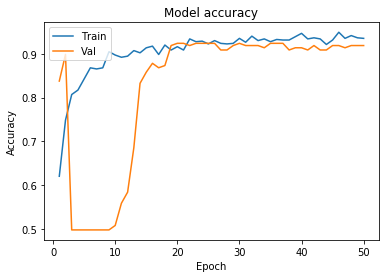

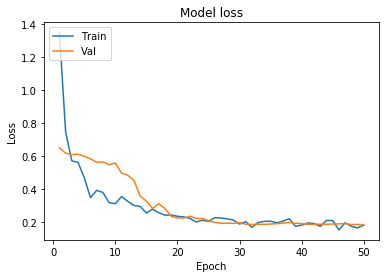

In [62]:
plot_learningCurve(history, epochs)

In [63]:
# Adding the flatten layer to increase the accuracy.

epochs = 50
model = Sequential()
model.add(Conv1D(32, 2, activation='relu', input_shape = x_train[0].shape))
model.add(BatchNormalization())
model.add(MaxPool1D(2))
model.add(Dropout(0.2))

model.add(Conv1D(64, 2, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool1D(2))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer=Adam(lr=0.0001), loss = 'binary_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=epochs, validation_data=(x_test, y_test), verbose=1)

Epoch 1/50
25/25 [==============================] - 0s 16ms/step - loss: 1.0308 - accuracy: 0.5769 - val_loss: 0.6461 - val_accuracy: 0.5533
Epoch 2/50
25/25 [==============================] - 0s 8ms/step - loss: 0.8104 - accuracy: 0.6429 - val_loss: 0.6186 - val_accuracy: 0.6701
Epoch 3/50
25/25 [==============================] - 0s 8ms/step - loss: 0.7232 - accuracy: 0.6671 - val_loss: 0.5869 - val_accuracy: 0.8223
Epoch 4/50
25/25 [==============================] - 0s 8ms/step - loss: 0.6201 - accuracy: 0.7306 - val_loss: 0.5507 - val_accuracy: 0.8579
Epoch 5/50
25/25 [==============================] - 0s 7ms/step - loss: 0.5996 - accuracy: 0.7408 - val_loss: 0.5128 - val_accuracy: 0.8934
Epoch 6/50
25/25 [==============================] - 0s 9ms/step - loss: 0.5321 - accuracy: 0.8005 - val_loss: 0.4746 - val_accuracy: 0.8985
Epoch 7/50
25/25 [==============================] - 0s 8ms/step - loss: 0.4269 - accuracy: 0.8285 - val_loss: 0.4377 - val_accuracy: 0.8985
Epoch 8/50
25/25 [=

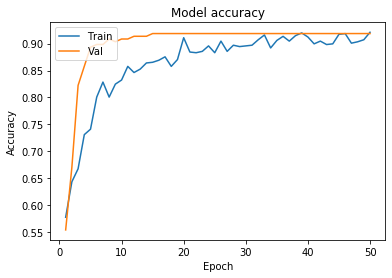

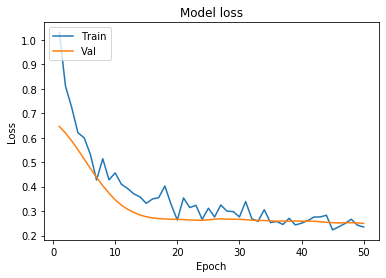

In [64]:
plot_learningCurve(history, epochs)